# Homework 2 

Plot the voltage signal $x(t)$ `trace1` from the microelectrode array and visually examine it. 
Spikes are very fast downward voltage excursions (sometimes reaching to ~ $ -100 \mu V$), followed 
by a small overshoot (zoom in to few spikes to see what they typically look like).

To get some sense of the signal, **plot a probability distribution function** (properly
normalized, so that $\int dx P (x) = 1$), of $x(t)$. **Estimate the error bars on the PDF**
by splitting the data multiple times into halves and compute the SD over PDF
estimates constructed from halves of the data. Is there any obvious feature for
negative voltages in the histogram where you could draw a threshold to recognize
the spikes easily? To identify the spikes, you can set a threshold. Scan a range of
thresholds, from $-70 \mu V$ and $-30 \mu V$ ; whenever the signal crosses the threshold
in a downward direction (please pay attention to this definition!), identify a
putative spike, and **plot the number of spikes as a function of the threshold**. By
examining the trace in detail, can you claim that any specific threshold is a good
choice for spike detection?

The problem seems to be in slow baseline fluctuations in the recorded voltage,
x(t), an intuition that could be made precise using spectral (Fourier) methods.
For now, estimate the slow baseline variation by smoothing the original signal
over the timescale of T = 100 consecutive time points. The simplest way to do
this is to define a new time series, x̃(t), such that each value of x̃ corresponds to
a moving average of the original time series, e.g.,
1
x̃(t) =
T
t+T /2
X
x(t 0 )
(15)
t 0 =t T /2+1
Subtract this slowly varying component from the original signal. Do you see
spikes more clearly now? Plot the number of detected spikes as a function of the
threshold, for thresholds between 75 μV and 30 μV . How dependent is the
number of spikes on the threshold now?
Now we will construct a curve similar to an often-used performance measure for
binary classification: the “receiver-operating characteristic” or an ROC curve a .
In classification scenarios, one often uses a threshold to determine whether some
event belongs to a particular class (is “positive” or P, when, e.g., above the
threshold) or not (is “negative” or N, when, e.g., below the threshold). If we
posses the “ground truth”, that is, we know with certainty how each event should
be assigned to P and N categories, we can compare the threshold-based classifier
with this ground truth, by computing two quantities: the “true positive rate”
(TP) and the “false positive rate” (FP). These quantities obviously depend on
the value of the threshold, and when plotted one against the other as a function
of that threshold, we obtain an ROC curve.
In our case, to see how important it is to subtract the slowly varying baseline,
let’s start by picking a particular threshold of 50 μV . Then, on the baseline-
subtracted trace, identify all the spikes and declare them to be correct identifica-
tions (“ground truth”). Now, go back to to the non-baseline subtracted case, and
identify the spikes using di↵erent threshold values. For every spike identified on
the non-baseline-subtracted trace, you can ask whether that was a true detection
or not compared to your ground truth. Plot the TP and FP rates as a function
of the threshold – this is a plot closely analogous to the ROC curve.
Why is this plot is closely analogous, but not exactly equal to standard ROC
curve, and what is the reason for the di↵erence? What kind of shape on TP vs
FP plot corresponds to good classification performance? Related to that, check
out what AOC means and how it relates to the ROC curve – this is one of the
standard measures of classifier performance.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy import stats
from scipy.stats import norm

In [9]:
# Import the data
trace1 = np.loadtxt(fname=('trace1.txt'))

### 1) Plot the voltage signal $x(t)$ `trace1` from the microelectrode array and visually examine it. Spikes are very fast downward voltage excursions (sometimes reaching to ~ $ -100 \mu V$), followed by a small overshoot (zoom in to few spikes to see what they typically look like).

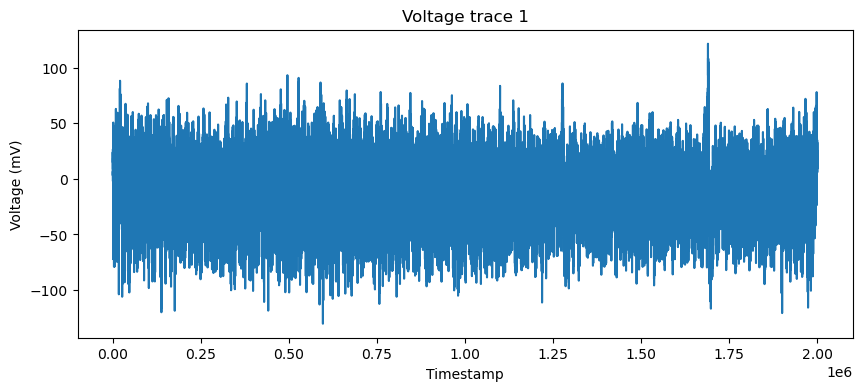

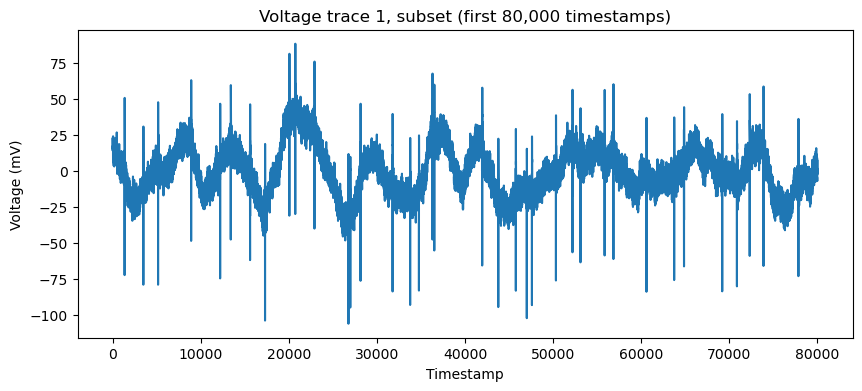

In [10]:
# Plot trace 1
plt.figure(figsize=(10,4))
plt.title('Voltage trace 1')
plt.xlabel('Timestamp')
plt.ylabel('Voltage (mV)')
plt.plot(trace1)
plt.show()

# Plot a subset
plt.figure(figsize=(10,4))
plt.title('Voltage trace 1, subset (first 80,000 timestamps)')
plt.xlabel('Timestamp')
plt.ylabel('Voltage (mV)')
plt.plot(trace1[0:80_000])
plt.show()

The data vector consists of $2 \times 10^6$ voltage samples, sampled at $2 \times 10^4 Hz$, for a total of 100 seconds. 100 seconds / $2 \times 10^6$ samples = $\frac{1}{20,000}$ = $5 \times 10^{-5}$ seconds per sample.

### 2) To get some sense of the signal, **plot a probability distribution function** (properly normalized, so that $\int dx P (x) = 1$), of $x(t)$.

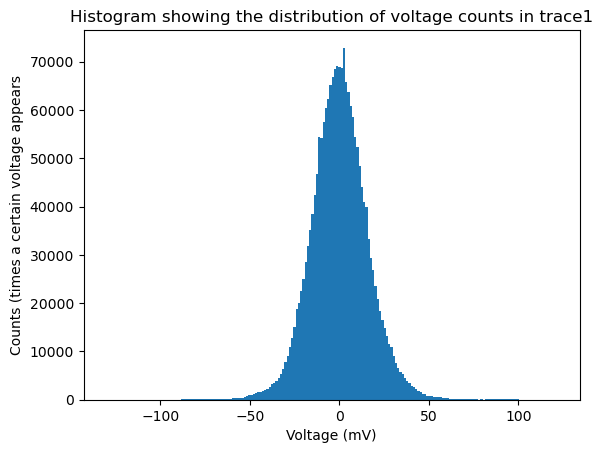

In [11]:
# First plot a histogram
numbins=200

plt.hist(trace1, bins=numbins)
plt.title('Histogram showing the distribution of voltage counts in trace1')
plt.xlabel('Voltage (mV)')
plt.ylabel('Counts (times a certain voltage appears')
plt.show()

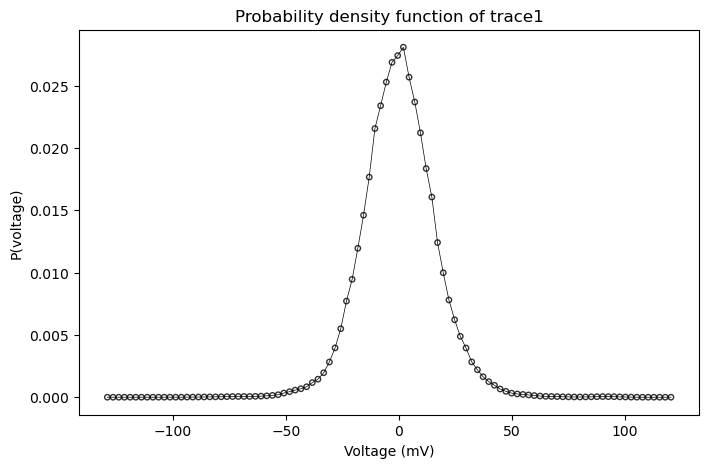

In [13]:
# Plot a normalized probability density function
numbins=100
counts, edges = np.histogram(trace1, bins=numbins, density=True)

# Get the center of the bin:
bin_centers = (edges[1:]+edges[:-1])/ 2 # take the average of the consecutive edges of each bin

# Plot the histogram:
plt.figure(figsize=(8,5))
plt.title('Probability density function of trace1')
plt.xlabel('Voltage (mV)')
plt.ylabel('P(voltage)')
plt.scatter(bin_centers, counts, marker='o', s=15,facecolors='none', edgecolors='k', alpha=0.8)
plt.plot(bin_centers, counts, linewidth=.5, color='k')
plt.show()

### Defining bins myself

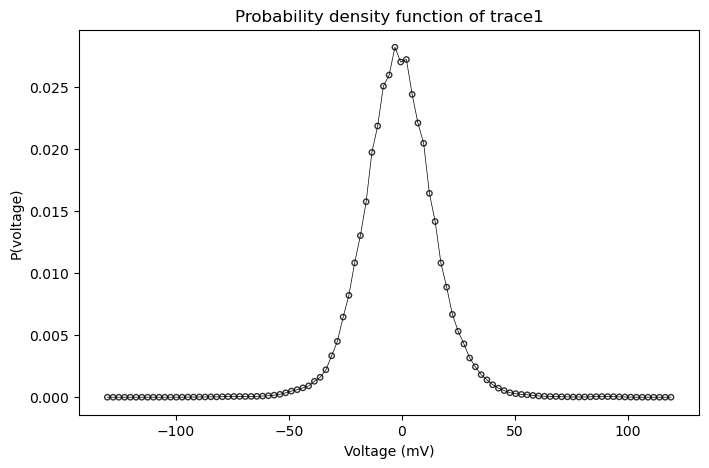

In [14]:
numbins=100
bins = np.linspace(np.min(trace1),np.max(trace1),numbins)
counts, _ = np.histogram(trace1, bins=bins, density=True)

# Plot the histogram:
plt.figure(figsize=(8,5))
plt.title('Probability density function of trace1')
plt.xlabel('Voltage (mV)')
plt.ylabel('P(voltage)')
plt.scatter(bins[:-1], counts, marker='o', s=15,facecolors='none', edgecolors='k', alpha=0.8)
plt.plot(bins[:-1], counts, linewidth=.5, color='k')
plt.show()

### Choosing a bin size
The bin size was chosen to be 100 by trial and error. There are only 2022 unique values in the dataset (see below), so e.g. 1000 bins doesn't make sense.

In [ ]:
len(np.unique(trace1))

In [ ]:
plt.figure(figsize=(20,3))
plt.suptitle('Trying different bin sizes', fontsize=16,y=1.1)

binsize=1000
counts, edges = np.histogram(trace1, bins=binsize, density=True)
bin_centers = (edges[1:]+edges[:-1])/ 2 # take the average of the consecutive edges of each bin
plt.subplot(141)
plt.title('Bin size: 1000')
plt.scatter(bin_centers, counts, marker='o', s=15,facecolors='none', edgecolors='k', alpha=0.8)
plt.plot(bin_centers, counts, linewidth=.5, color='k')

binsize=500
counts, edges = np.histogram(trace1, bins=binsize, density=True)
bin_centers = (edges[1:]+edges[:-1])/ 2 # take the average of the consecutive edges of each bin
plt.subplot(142)
plt.title('Bin size: 500')
plt.scatter(bin_centers, counts, marker='o', s=15,facecolors='none', edgecolors='k', alpha=0.8)
plt.plot(bin_centers, counts, linewidth=.5, color='k')

binsize=50
counts, edges = np.histogram(trace1, bins=binsize, density=True)
bin_centers = (edges[1:]+edges[:-1])/ 2 # take the average of the consecutive edges of each bin
plt.subplot(143)
plt.title('Bin size: 50')
plt.scatter(bin_centers, counts, marker='o', s=15,facecolors='none', edgecolors='k', alpha=0.8)
plt.plot(bin_centers, counts, linewidth=.5, color='k')

binsize=20
counts, edges = np.histogram(trace1, bins=binsize, density=True)
bin_centers = (edges[1:]+edges[:-1])/ 2 # take the average of the consecutive edges of each bin
plt.subplot(144)
plt.title('Bin size: 20')
plt.scatter(bin_centers, counts, marker='o', s=15,facecolors='none', edgecolors='k', alpha=0.8)
plt.plot(bin_centers, counts, linewidth=.5, color='k')

plt.show()

### 3) **Estimate the error bars** on the PDF by splitting the data multiple times into halves and compute the SD over PDF estimates constructed from halves of the data. Is there any obvious feature for negative voltages in the histogram where you could draw a threshold to recognize the spikes easily?

I plotted the PDF on a log scale to get a better sense of the nonlinearities, which should correspond to the spikes. Just judging by eye, these seems to begin at roughly $\pm 50 mV$. The error bars on the tails are also very large.

### Old way

In [ ]:
subsetSize = len(trace1)/2
repetitions = 100

def bootstrap(data, subsetSize, repetitions):
    '''
    Splits the data  into random halves (not preserving continuity, assuming IID) and calculates the standard deviation (std).
    Input: data, subsetSize = size of the random sample, repetitions = number of times to split the data and compute the std.
    Returns subsets (the randomly drawn points), pdfEstimates, which bins and estimates a PDF of the subset, pdfedges, the bin edges for pdfEstimates, and stdEstimates, the error bars.
    '''
    subsets = np.ndarray((repetitions, int(subsetSize)))
    pdfEstimates = np.ndarray((repetitions, numbins)) 
    stdEstimates = np.ndarray((repetitions, numbins))
    for run in range(repetitions):
        # randomly select half the data points (k = length of subset) and store in a matrix where the rows are subsets and the columns are runs
        subsets[run] = random.choices(data, k=int(subsetSize))
        # estimate the PDF from each subset, using the same number of bins as for our full PDF
        pdfEstimates[run], pdfedges = np.histogram(subsets[run], bins=numbins, density=True)
    # estimate the standard deviation of the PDF ????????????????
    stdEstimates = np.std(pdfEstimates, axis=0)
    return subsets, pdfEstimates, pdfedges, stdEstimates

subsets, pdfEstimates, pdfedges, stdEstimates = bootstrap(trace1, subsetSize, repetitions)

### New way = With separate functions

In [15]:
subsetSize = int(len(trace1)/2)
repetitions = 100

def bootstrap(data, subsetSize, repetitions):
    '''
    Splits the data  into random halves (not preserving continuity, assuming IID).
    Input: data, subsetSize = size of the random sample, repetitions = number of times to split the data.
    Returns subsets (the randomly drawn points).
    '''
    subsets = np.ndarray((repetitions, subsetSize))
    for run in range(repetitions):
        # randomly select half the data points (k = length of subset) and store in a matrix where the rows are subsets and the columns are runs
        subsets[run] = random.choices(data, k=int(subsetSize))
    return subsets

subsets = bootstrap(trace1, subsetSize, repetitions)

In [17]:
def pdf_sample(bootstrapped_subsets, bins):
    '''
    Takes an array of n bootstrapped samples of m elements and estimates a pdf given some bins.
    Input: an mxn array of samples, a list of b bin edges
    Output: a bxn array of PDFs
    '''
    # Define the size of the output array
    numbins=int(bins.size)-1
    repetitions = bootstrapped_subsets.shape[0]
    pdfEstimates = np.zeros((repetitions, numbins))
    
    # Find PDF = bin the data according to our predefined bins and return counts per bins
    for run in range(repetitions):
        subset = bootstrapped_subsets[run,:]
        pdfEstimates[run,:], _ = np.histogram(subset, bins=bins, density=True)
    
    return pdfEstimates

In [18]:
# Find the mean and std for each bin across all pdf estimate

pdfEstimates = pdf_sample(subsets, bins)

bstrapped_means = np.mean(pdfEstimates, axis=0)
bstrapped_stds = np.std(pdfEstimates, axis=0)

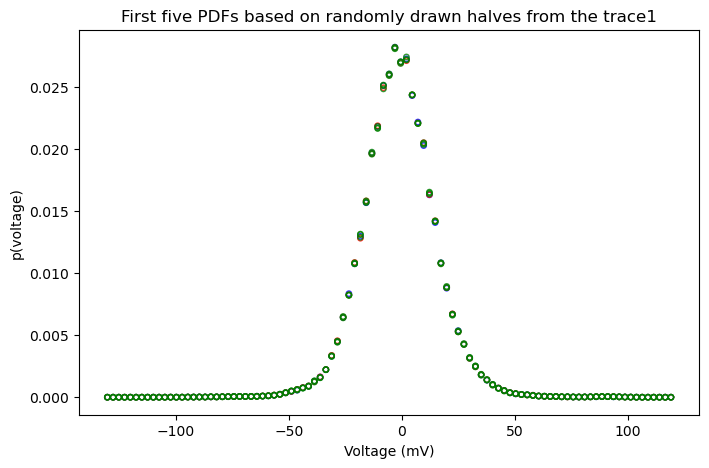

In [19]:
plt.figure(figsize=(8,5))
plt.title('First five PDFs based on randomly drawn halves from the trace1')
plt.xlabel('Voltage (mV)')
plt.ylabel('p(voltage)')
plt.scatter(bins[:-1], pdfEstimates[0], marker='o', s=15,facecolors='none', edgecolors='b', alpha=0.8)
plt.scatter(bins[:-1], pdfEstimates[1], marker='o', s=15,facecolors='none', edgecolors='r', alpha=0.8)
plt.scatter(bins[:-1], pdfEstimates[2], marker='o', s=15,facecolors='none', edgecolors='g', alpha=0.8)
plt.scatter(bins[:-1], pdfEstimates[3], marker='o', s=15,facecolors='none', edgecolors='g', alpha=0.8)
plt.scatter(bins[:-1], pdfEstimates[4], marker='o', s=15,facecolors='none', edgecolors='g', alpha=0.8)
plt.show()

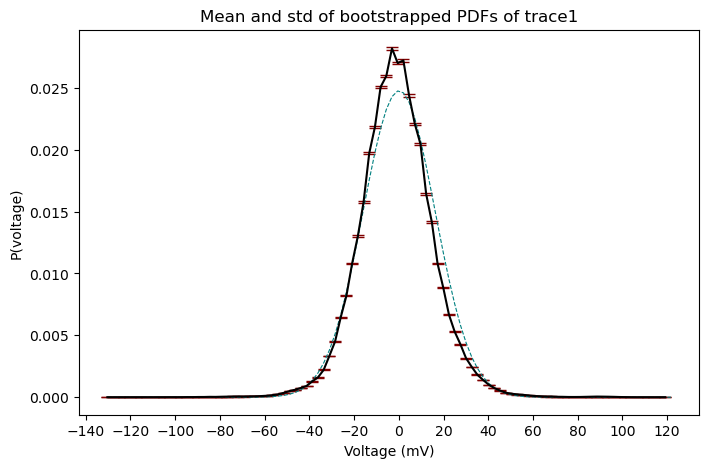

In [62]:
# Plot our histogram again:
plt.figure(figsize=(8,5))
plt.title('Mean and std of bootstrapped PDFs of trace1')
plt.xlabel('Voltage (mV)')
plt.xticks(np.arange(-140, 140, 20))
plt.ylabel('P(voltage)')
plt.errorbar(bins[:-1], bstrapped_means, yerr=bstrapped_stds, elinewidth=0.5, capsize=4, color='k', ecolor='maroon')

# Overlay normal distribution
mu = np.mean(trace1)
sigma = np.std(trace1)
plt.plot(bins, norm.pdf(bins, mu, sigma), linestyle='--', linewidth=0.8, color='teal')
                  

plt.show()

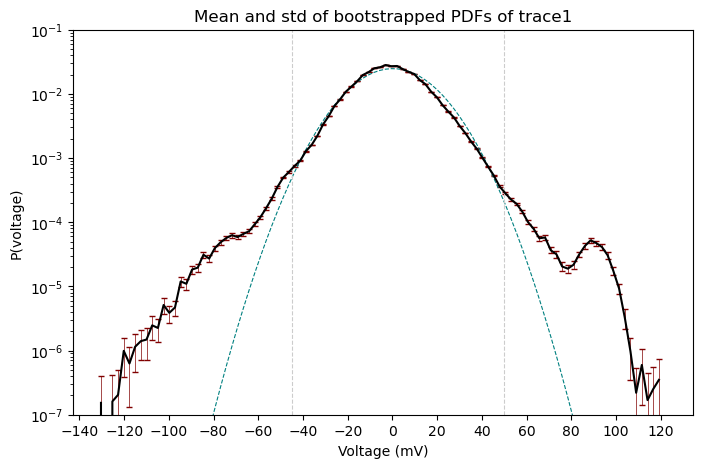

In [63]:
# Plot our histogram again:
plt.figure(figsize=(8,5))
plt.title('Mean and std of bootstrapped PDFs of trace1')
plt.xlabel('Voltage (mV)')
plt.xticks(np.arange(-140, 140, 20))
plt.ylabel('P(voltage)')
plt.errorbar(bins[:-1], bstrapped_means, yerr=bstrapped_stds, elinewidth=0.5, capsize=2, color='k', ecolor='maroon')
plt.yscale('log')
# print(bins.min())

# Superimpose a normal distribution
mu = np.mean(trace1)
sigma = np.std(trace1)
plt.plot(bins, norm.pdf(bins, mu, sigma), linestyle='--', linewidth=0.8, color='teal')
plt.ylim(10e-8,10e-2)

# Indicate non-linearities
plt.axvline(x=-45, linestyle='--', linewidth=0.8, color='0.8')
plt.axvline(x=50, linestyle='--', linewidth=0.8, color='0.8')

plt.show()

### 4) To identify the spikes, you can set a threshold. Scan a range of thresholds, from $-70 \mu V$ and $-30 \mu V$ ; whenever the signal crosses the threshold in a downward direction (please pay attention to this definition!), identify a putative spike, and **plot the number of spikes as a function of the threshold**. By examining the trace in detail, can you claim that any specific threshold is a good choice for spike detection?
I plotted spike detection timestamps on a subset of trace 1 for a range of thresholds. Based on this, a threshold of -35 mV seemed to perform the best, although there were still some areas of false positives and false negatives. Below -35 mV, there were a lot of false positives, and above that, many spikes failed to be detected (false negatives).

In [66]:
thresholdRange = np.arange(-70, -30+1, 5)

def getSpikes(data, threshold_mV):
    '''
    This function returns the number of spikes given a threshold. A spike is defined as a point during which the 
    signal crosses the threshold in a downward direction.
    '''
    # For each timestamp check if the voltage dips below threshold_mV and is decreasing (next timestamp is more negative than previous one).
    # Note on finding whether the voltage is decreasing: np.diff returns e[i+1]-e[i], so np.diff(data)<0 returns True if the subsequent element is more negative.
    # Because we can't know whether the function is decreasing after the last element, our spike detection only works up to the last element of the data.
    boolSpike = (data[:-1]<threshold_mV) & (np.diff(data)<0)
    spikeCount = sum(boolSpike)
    spikeIdx = np.where(boolSpike)[0]
    
    return spikeCount, spikeIdx

In [82]:
spikeCounts = np.zeros(len(thresholdRange))
spikeIdx = np.zeros(len(thresholdRange))

for threshold in range(len(thresholdRange)):
    spikeCounts[threshold], spikeIdx = getSpikes(trace1, thresholdRange[threshold])

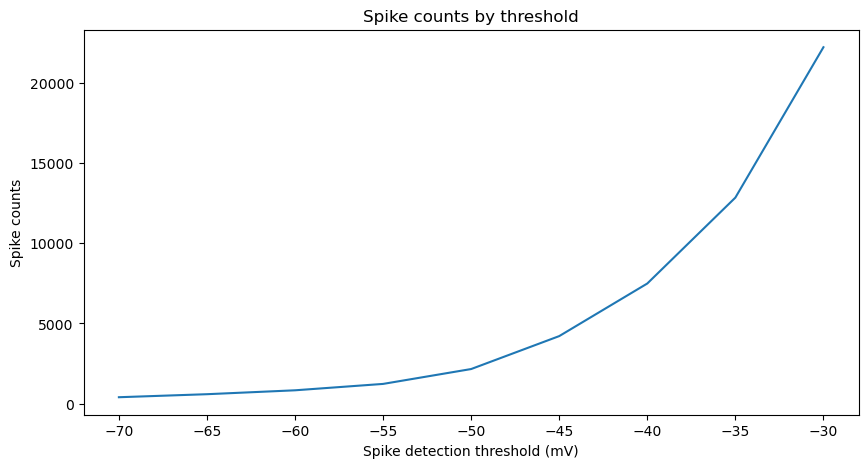

In [85]:
plt.figure(figsize=(10,5))
plt.title('Spike counts by threshold')
plt.xlabel('Spike detection threshold (mV)')
plt.ylabel('Spike counts')
plt.plot(thresholdRange,spikeCounts)
# plt.yscale('log')
plt.show()

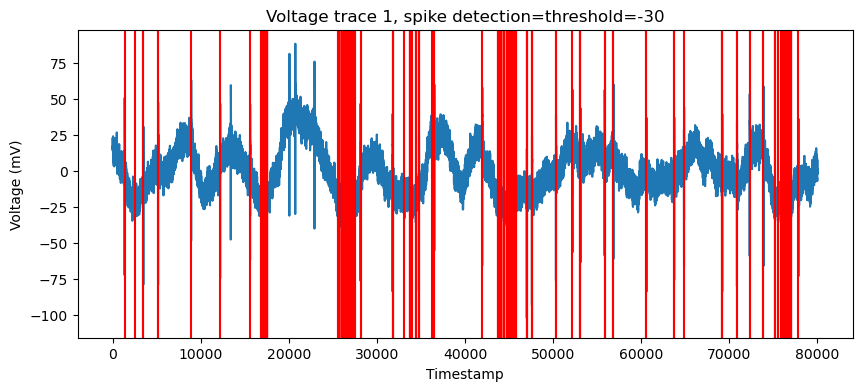

In [87]:
# Plot spikes on subset
threshold = -30
plt.figure(figsize=(10,4))
plt.title(f'Voltage trace 1, spike detection=threshold={threshold}')
plt.xlabel('Timestamp')
plt.ylabel('Voltage (mV)')
plt.plot(trace1[0:80_000])

_, spikeIdx = getSpikes(trace1[0:80_000], threshold)

for idx in range(len(spikeIdx)):
    plt.axvline(x=spikeIdx[idx], color='r')

plt.show()

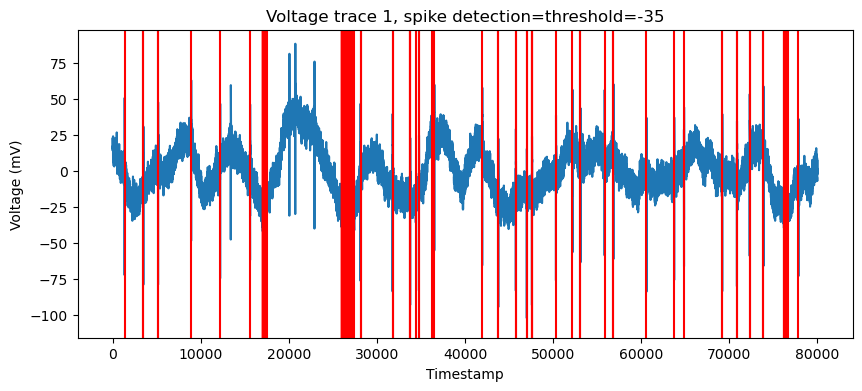

In [70]:
# Plot spikes on subset
threshold = -35
plt.figure(figsize=(10,4))
plt.title(f'Voltage trace 1, spike detection=threshold={threshold}')
plt.xlabel('Timestamp')
plt.ylabel('Voltage (mV)')
plt.plot(trace1[0:80_000])

_, spikeIdx = getSpikes(trace1[0:80_000], threshold)

for idx in range(len(spikeIdx)):
    plt.axvline(x=spikeIdx[idx], color='r')

plt.show()

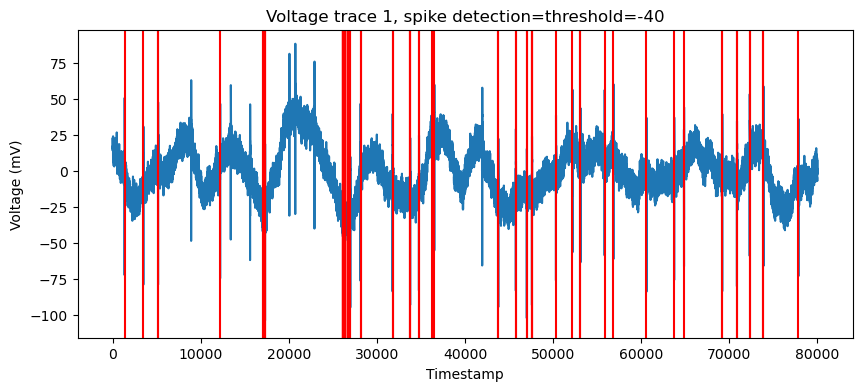

In [88]:
# Plot spikes on subset
threshold = -40
plt.figure(figsize=(10,4))
plt.title(f'Voltage trace 1, spike detection=threshold={threshold}')
plt.xlabel('Timestamp')
plt.ylabel('Voltage (mV)')
plt.plot(trace1[0:80_000])

_, spikeIdx = getSpikes(trace1[0:80_000], threshold)

for idx in range(len(spikeIdx)):
    plt.axvline(x=spikeIdx[idx], color='r')

plt.show()

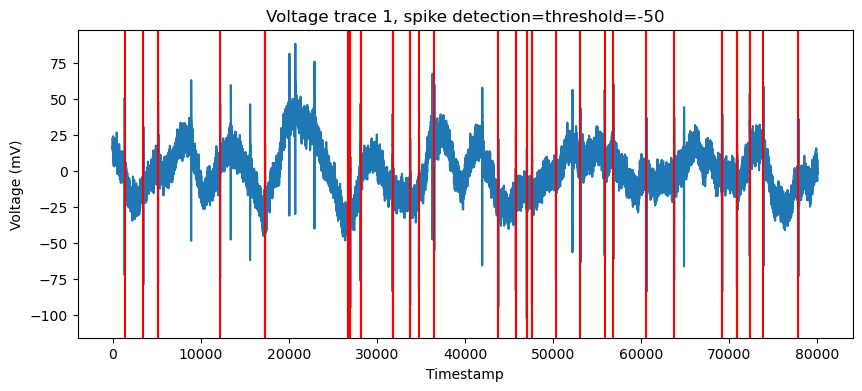

In [72]:
# Plot spikes on subset
threshold = -50
plt.figure(figsize=(10,4))
plt.title(f'Voltage trace 1, spike detection=threshold={threshold}')
plt.xlabel('Timestamp')
plt.ylabel('Voltage (mV)')
plt.plot(trace1[0:80_000])

_, spikeIdx = getSpikes(trace1[0:80_000], threshold)

for idx in range(len(spikeIdx)):
    plt.axvline(x=spikeIdx[idx], color='r')

plt.show()

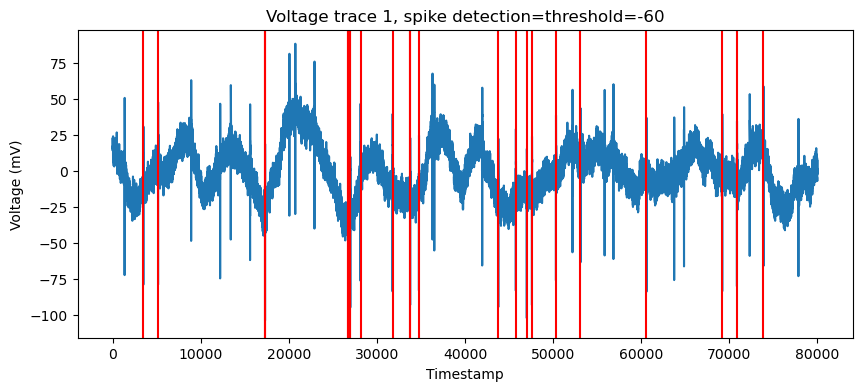

In [73]:
# Plot spikes on subset
threshold = -60
plt.figure(figsize=(10,4))
plt.title(f'Voltage trace 1, spike detection=threshold={threshold}')
plt.xlabel('Timestamp')
plt.ylabel('Voltage (mV)')
plt.plot(trace1[0:80_000])

_, spikeIdx = getSpikes(trace1[0:80_000], threshold)

for idx in range(len(spikeIdx)):
    plt.axvline(x=spikeIdx[idx], color='r')

plt.show()

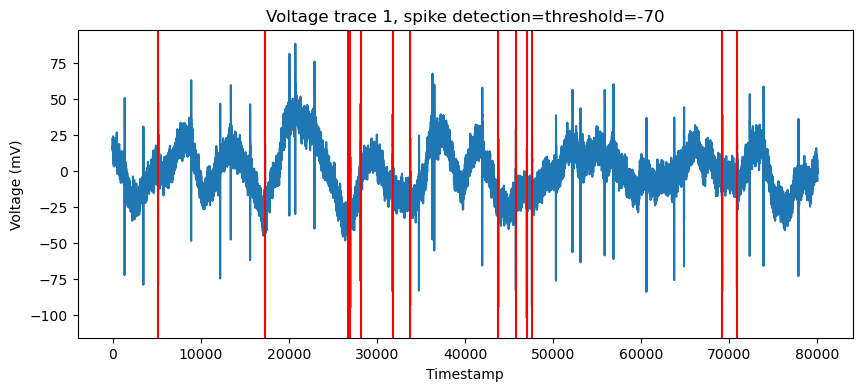

In [74]:
# Plot spikes on subset
threshold = -70
plt.figure(figsize=(10,4))
plt.title(f'Voltage trace 1, spike detection=threshold={threshold}')
plt.xlabel('Timestamp')
plt.ylabel('Voltage (mV)')
plt.plot(trace1[0:80_000])

_, spikeIdx = getSpikes(trace1[0:80_000], threshold)

for idx in range(len(spikeIdx)):
    plt.axvline(x=spikeIdx[idx], color='r')

plt.show()

## Subtract the underlying signal
Taken from HW7

In [75]:
def compute_baseline(trace, T):
    """
    Computes the baseline fluctuation using a sliding window of T timestamps and taking the average value.
    """
    baseline = np.zeros(len(trace))
    for t in range(len(trace)): # iterate over each trace element
        t_lower = int(t-T/2+1) # find the lower bound of the sliding window
        t_upper = int(t+T/2) # find the upper bound of the sliding window
        sum_ts = 0 # sum all the ts in the range
        counts = 0 # count the positive indices in the range
        for t_index in range(t_lower, t_upper+1): # iterate over each element of the window; if it's positive, sum it. Then divide by the total elements.
            if t_index>=0 and t_index<len(trace):
                sum_ts = sum_ts + trace[t_index]
                counts = counts + 1
        if counts>0:
            baseline[t] = sum_ts / counts
        
    return baseline

In [78]:
T = 100
baseline = compute_baseline(trace1, T)

In [79]:
trace1_meansub = trace1 - baseline

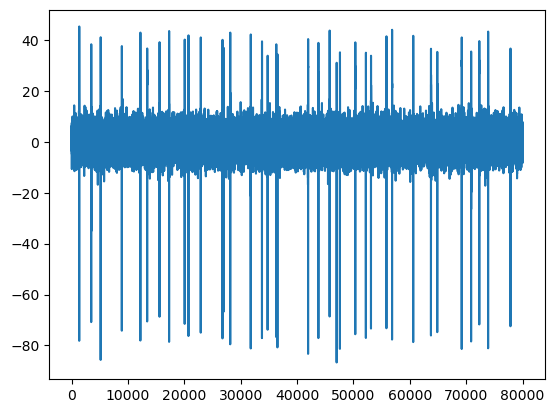

In [81]:
plt.plot(trace1_meansub[:80_000])
plt.show()

In [84]:
spikeCounts_meansub = np.zeros(len(thresholdRange))
spikeIdx_meansub = np.zeros(len(thresholdRange))

for threshold in range(len(thresholdRange)):
    spikeCounts_meansub[threshold], spikeIdx_meansub = getSpikes(trace1_meansub, thresholdRange[threshold])

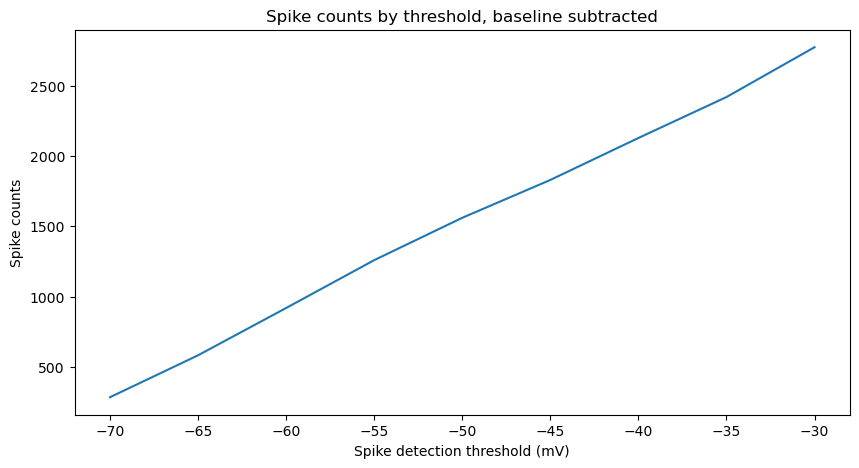

In [86]:
plt.figure(figsize=(10,5))
plt.title('Spike counts by threshold, baseline subtracted')
plt.xlabel('Spike detection threshold (mV)')
plt.ylabel('Spike counts')
plt.plot(thresholdRange,spikeCounts_meansub)
# plt.yscale('log')
plt.show()

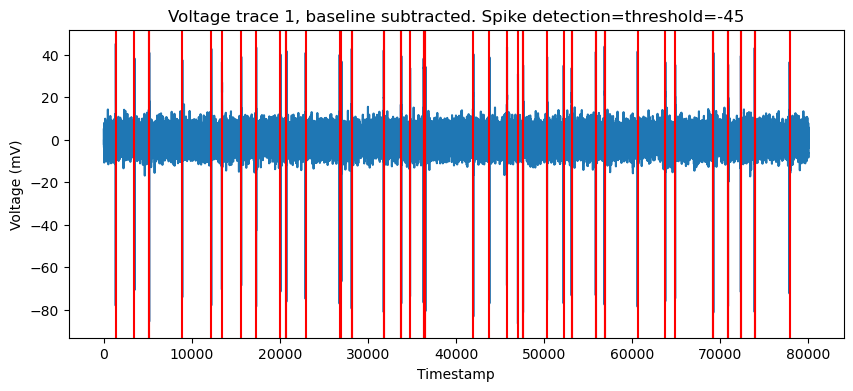

In [106]:
# Plot spikes on subset
threshold = -45
plt.figure(figsize=(10,4))
plt.title(f'Voltage trace 1, baseline subtracted. Spike detection=threshold={threshold}')
plt.xlabel('Timestamp')
plt.ylabel('Voltage (mV)')
plt.plot(trace1_meansub[0:80_000])

_, spikeIdx_meansub = getSpikes(trace1_meansub[0:80_000], threshold)

for idx in range(len(spikeIdx_meansub)):
    plt.axvline(x=spikeIdx_meansub[idx], color='r')

plt.show()